In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
from scipy.optimize import curve_fit
import os


In [3]:
directory_list = [os.path.join('..', 'Inputs_outputs_excels', 'rate_of_change_df.xlsx')]

In [4]:
ROC=['Rate of change ANDER/flow.bc',
     'Rate of change BONN/flow.obs',
     'Rate of change KOELN/flow.obs',
     'Rate of change DUESS/flow.obs',
     'Rate of change DUISB/flow.obs',
     'Rate of change WESEL/flow.obs',
     'Rate of change REES/flow.obs',
     'Rate of change EMMER/flow.obs']

real_flow= ['BONN/flow.obs',
        'KOELN/flow.obs',
        'DUESS/flow.obs',
        'DUISB/flow.obs',
        'WESEL/flow.obs',
        'REES/flow.obs',
        'EMMER/flow.obs']

flow_bc=['BONN/flow.bc',
        'KOELN/flow.bc',
        'DUESS/flow.bc',
        'DUISB/flow.bc',
        'WESEL/flow.bc',
        'REES/flow.bc',
        'EMMER/flow.bc']

In [40]:
rename_mapping_x = {
    'Rate of change ANDER/flow.bc': 'Rate of change Andernach',
    'Rate of change BONN/flow.obs': 'Rate of change Bonn',
    'Rate of change KOELN/flow.obs': 'Rate of change Köln',
    'Rate of change DUESS/flow.obs': 'Rate of change Düsseldorf',
    'Rate of change DUISB/flow.obs': 'Rate of change Duisburg',
    'Rate of change WESEL/flow.obs': 'Rate of change Wesel',
    'Rate of change REES/flow.obs': 'Rate of change Rees',
    'Rate of change EMMER/flow.obs': 'Rate of change Emmerich'
}

rename_mapping_y = {
    'BONN/flow.bc': 'Bonn MBC',
    'KOELN/flow.bc': 'Köln MBC',
    'DUESS/flow.bc': 'Düsseldorf MBC',
    'DUISB/flow.bc': 'Duisburg MBC',
    'WESEL/flow.bc': 'Wesel MBC',
    'REES/flow.bc': 'Rees MBC',
    'EMMER/flow.bc': 'Emmerich MBC'
}

In [41]:
low_flow=792
high_flow= 5600

def categorize_flow(flow):
    if flow<low_flow:
        return 'Low flows'
    elif flow>high_flow:
        return 'High flows'
    else:
        return 'Normal flows'


<h1>Using matplotlib</h1>

In [44]:
def scatter_plots_matplotlib(attribute1, attribute2, flow_real, data_frame):
    # Remove rows with NaN values
    data_frame = data_frame.dropna(subset=[attribute1, attribute2])
    data_frame['flow_category'] = data_frame[flow_real].apply(categorize_flow)

    categories = {'Normal flows': 'green', 'High flows': 'red', 'Low flows': 'blue'}

    plt.figure(figsize=(10, 6))

    for category, color in categories.items():
        subset = data_frame[data_frame['flow_category'] == category]
        plt.scatter(subset[attribute1], subset[attribute2], c=color, label=category, alpha=0.5)

    plt.title(f"Scatter Plot: {attribute1} vs {attribute2}")
    plt.xlabel(rename_mapping_x.get(attribute1, attribute1) + ' [m³/s]')
    plt.ylabel(rename_mapping_y.get(attribute2, attribute2) + ' [m³/s]')

    # Add OLS trendline
    X = data_frame[attribute1]
    Y = data_frame[attribute2]
    X_ols = sm.add_constant(X)
    model = sm.OLS(Y, X_ols).fit()
    predictions = model.predict(X_ols)
    plt.plot(X, predictions, color='red', label='Trendline')

    # Calculate and display correlation coefficient
    correlation = data_frame[attribute1].corr(data_frame[attribute2])
    R_squared = correlation * correlation
    plt.text(0.05, 0.95, f'R: {correlation:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



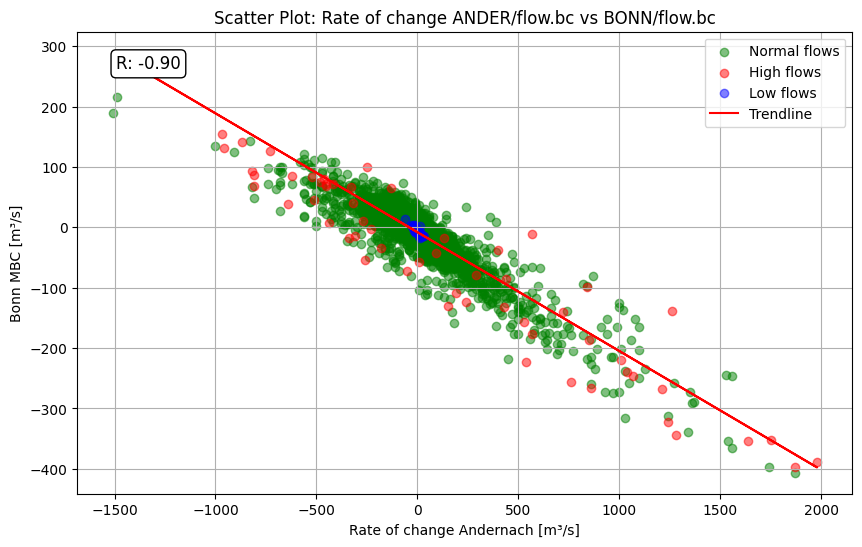

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



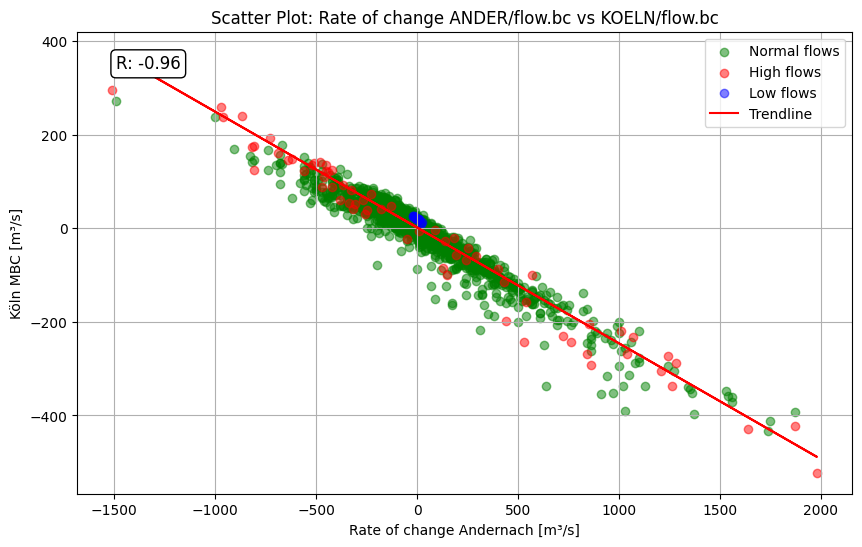

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



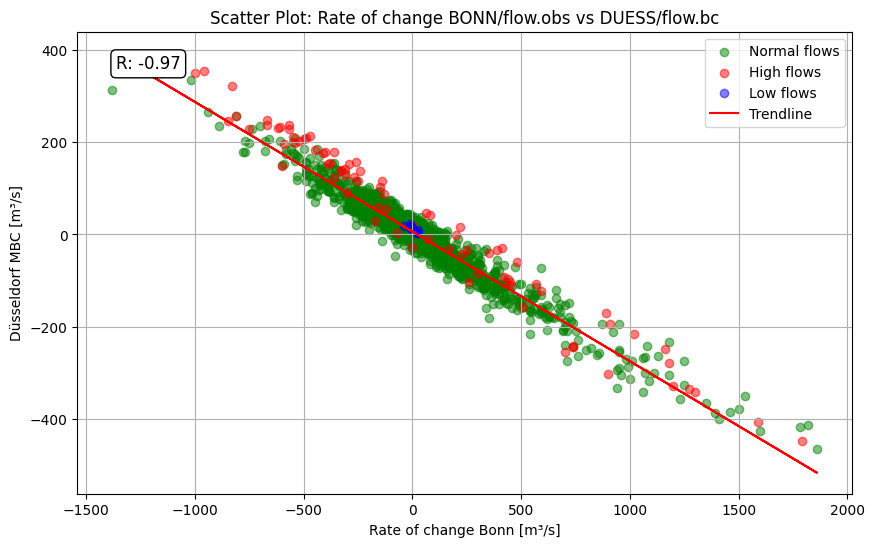

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



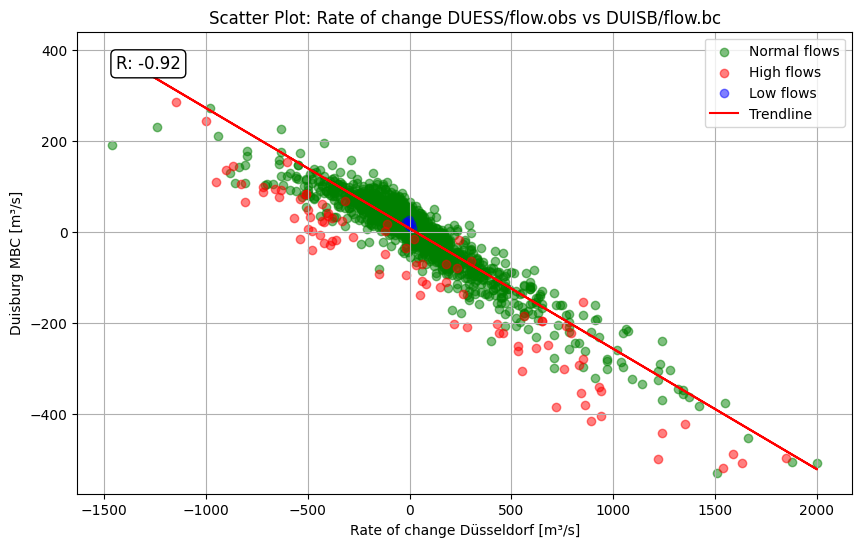

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



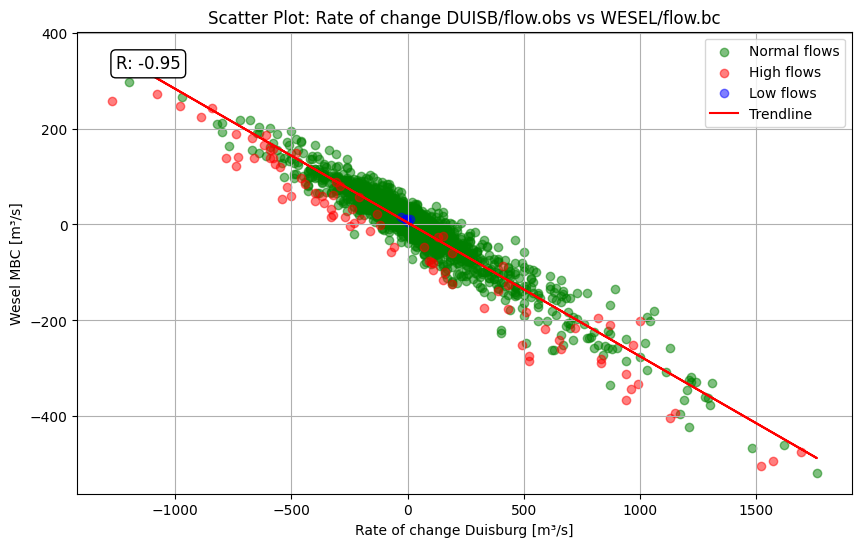

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



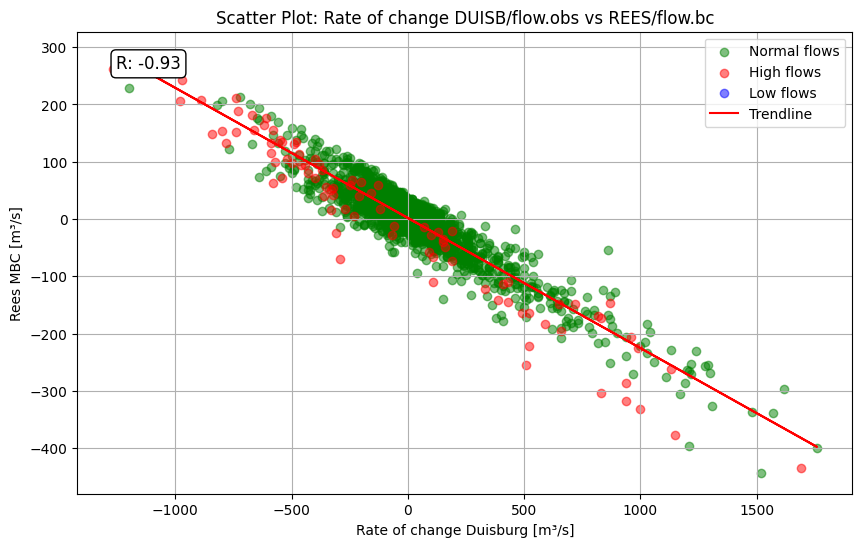

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



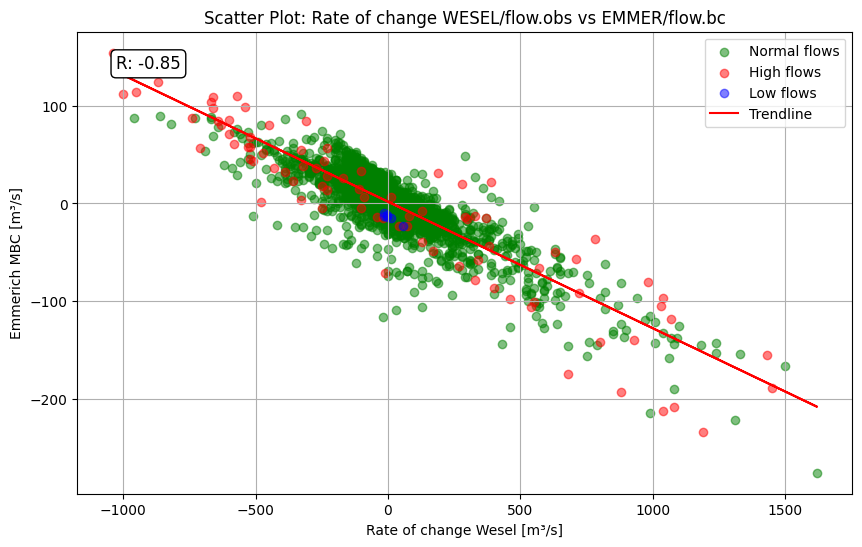

C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\1363923298.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



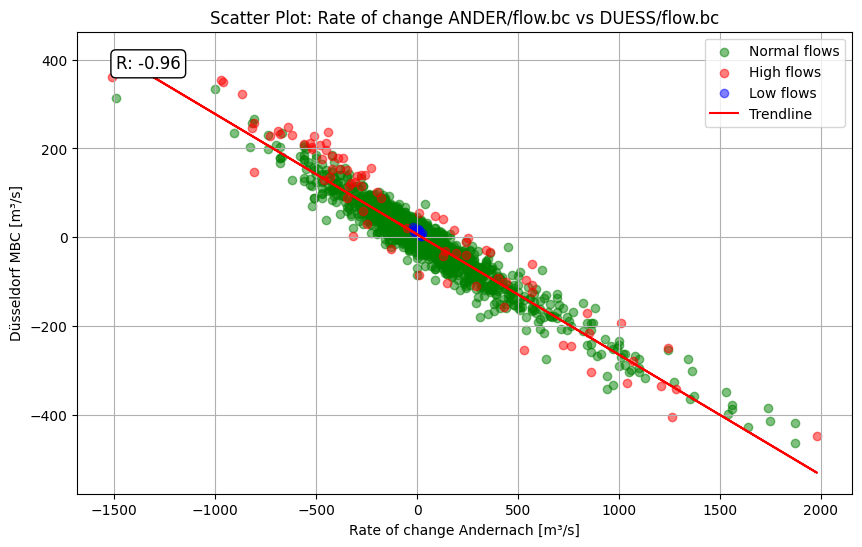

In [48]:
data_frame=pd.read_excel(directory_list[0])

scatter_plots_matplotlib(ROC[0], flow_bc[0],real_flow[0] ,data_frame)
scatter_plots_matplotlib(ROC[0], flow_bc[1],real_flow[1] ,data_frame)
scatter_plots_matplotlib(ROC[1], flow_bc[2],real_flow[2] ,data_frame)
scatter_plots_matplotlib(ROC[3], flow_bc[3],real_flow[3] ,data_frame)
scatter_plots_matplotlib(ROC[4], flow_bc[4],real_flow[4] ,data_frame)
scatter_plots_matplotlib(ROC[4], flow_bc[5],real_flow[5] ,data_frame)
scatter_plots_matplotlib(ROC[5], flow_bc[6],real_flow[6] ,data_frame)
scatter_plots_matplotlib(ROC[0], flow_bc[2],real_flow[2] ,data_frame)

<h1>Using plotly</h1>

In [46]:


def scatter_plots(attribute1, attribute2, flow_real, data_frame):
    # Remove rows with NaN values
    data_frame = data_frame.dropna(subset=[attribute1, attribute2])
    data_frame['flow_category'] = data_frame[flow_real].apply(categorize_flow)

    # Create scatter plot using Plotly Express
    fig = px.scatter(data_frame,
                     x=attribute1,
                     y=attribute2,
                     color='flow_category',
                     title=f"Scatter Plot with Trendline: {attribute1} vs {attribute2}. Unit: m³/s")

    # Add OLS trendline
    X = data_frame[attribute1]
    Y = data_frame[attribute2]
    X_ols = sm.add_constant(X)
    model = sm.OLS(Y, X_ols).fit()
    predictions = model.predict(X_ols)
    fig.add_trace(go.Scatter(x=X,
                             y=predictions,
                             mode='lines',
                             name='OLS Trendline',
                             line={'color': 'red'}))

    fig.update_layout(width=800,
                      height=600,
                      xaxis={'showline': True, 'linewidth': 1, 'linecolor': 'black', 'mirror': True},
                      yaxis={'showline': True, 'linewidth': 1, 'linecolor': 'black', 'mirror': True},
                      template='simple_white')

    # Add 2nd-degree polynomial trendline
    def poly2(x, a, b, c):
        return a * x**2 + b * x + c

    params, _ = curve_fit(poly2, X, Y)
    X_sorted = np.sort(X)

    fig.add_trace(go.Scatter(x=X_sorted,
                             y=poly2(X_sorted, *params),
                             mode='lines',
                             name='2nd Degree Polynomial',
                             line={'color': 'orange'}))

    fig.show()

    correlation = data_frame[attribute1].corr(data_frame[attribute2])
    print("R² Correlation coefficient:", correlation*correlation)

In [47]:
data_frame=pd.read_excel(directory_list[3])

for i in range(len(flow_bc)):
   scatter_plots(ROC[i], flow_bc[i],real_flow[i] ,data_frame)



C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['flow_category'] = data_frame[flow_real].apply(categorize_flow)


R² Correlation coefficient: 0.8056618706702344


C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R² Correlation coefficient: 0.9015976039623146


R² Correlation coefficient: 0.9175205800832581


C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R² Correlation coefficient: 0.8390591662596092


C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R² Correlation coefficient: 0.9025270893449744


C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R² Correlation coefficient: 0.8423255823295636


C:\Users\sujan.maharjan\AppData\Local\Temp\ipykernel_3844\432724265.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R² Correlation coefficient: 0.6991887588407042
